# Session 4

Agenda:
1.	Questions & Homework
2.	Import Data from GV
3.	Flatten data from GV
    * does json_normalize work? no
    * short introduction to pd.Series
    * short introduction to apply(pd.Series)
    * GV data
4.	Data Analysis and Visualization with GV data
5.	Use Case and Exercises on GV data


## 1 Questions and Homework

### Exercise 1: json simple (wine)

In [ ]:

/Users/domod/Google Drive/Dokumente_googledrive/20_Python_tutorial_kleiolabs/Wine_averagePricePointsItaly.json

In [1]:
import pandas as pd
import numpy as np
import json
import pprint
pd.set_option('max_rows', 50) 
# pd.get_option("display.max_rows")

In [2]:
with open('/Users/domod/Google Drive/Dokumente_googledrive/20_Python_tutorial_kleiolabs/Wine_averagePricePointsItaly.json' ) as f:
    averagePricePointsItalyJSON = json.load(f)

#### Open the json file as dataframe with pandas

In [7]:
italyAveragePriceDF = pd.DataFrame(averagePricePointsItalyJSON)

pd.DataFrame(averagePricePointsItalyJSON).head(10)

,count_price,mean_price,count_point,mean_point
Central Italy,1100.0,25.437273,1233.0,87.391727
Italy Other,112.0,32.071429,135.0,88.148148
Lombardy,481.0,36.952183,533.0,88.874296
Northeastern Italy,1986.0,27.047835,2138.0,87.995790
Northwestern Italy,13.0,22.076923,13.0,87.000000
Piedmont,3089.0,54.957268,3729.0,89.536873
Sicily & Sardinia,1559.0,27.623477,1797.0,88.109071
Southern Italy,1131.0,27.802829,1349.0,87.838399
Tuscany,5128.0,47.683697,5897.0,89.074614
Veneto,2315.0,34.007343,2716.0,87.715022


In [4]:
pprint.pprint(averagePricePointsItalyJSON)

{'count_point': {'Central Italy': 1233.0,
                 'Italy Other': 135.0,
                 'Lombardy': 533.0,
                 'Northeastern Italy': 2138.0,
                 'Northwestern Italy': 13.0,
                 'Piedmont': 3729.0,
                 'Sicily & Sardinia': 1797.0,
                 'Southern Italy': 1349.0,
                 'Tuscany': 5897.0,
                 'Veneto': 2716.0},
 'count_price': {'Central Italy': 1100.0,
                 'Italy Other': 112.0,
                 'Lombardy': 481.0,
                 'Northeastern Italy': 1986.0,
                 'Northwestern Italy': 13.0,
                 'Piedmont': 3089.0,
                 'Sicily & Sardinia': 1559.0,
                 'Southern Italy': 1131.0,
                 'Tuscany': 5128.0,
                 'Veneto': 2315.0},
 'mean_point': {'Central Italy': 87.3917274939,
                'Italy Other': 88.1481481481,
                'Lombardy': 88.8742964353,
                'Northeastern Italy': 87.99579045

#### Visualize a bar plot with the mean prices for all regions

<AxesSubplot:>

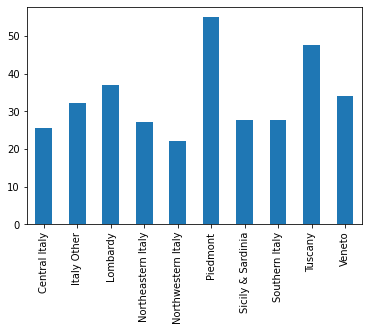

In [10]:
italyAveragePriceDF['mean_price'].plot.bar()


<AxesSubplot:>

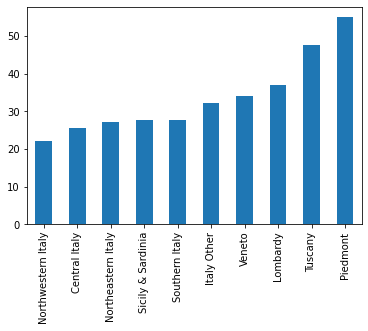

In [14]:
italyAveragePriceDF['mean_price'].sort_values().plot.bar()

#### Export as CSV

In [ ]:
italyAveragePriceDF.to_csv("/Users/domod/Google Drive/Dokumente_googledrive/20_Python_tutorial_kleiolabs/italyAveragePriceDF_test.csv")

### Exercise 2: json nested student

In [15]:
# load toy data set as dataframe
URL = 'http://raw.githubusercontent.com/BindiChen/machine-learning/master/data-analysis/027-pandas-convert-json/data/nested_list.json'
dfJSON = pd.read_json(URL)

In [16]:
dfJSON

,school_name,class,students
0,ABC primary school,Year 1,"{'id': 'A001', 'name': 'Tom', 'math': 60, 'phy..."
1,ABC primary school,Year 1,"{'id': 'A002', 'name': 'James', 'math': 89, 'p..."
2,ABC primary school,Year 1,"{'id': 'A003', 'name': 'Jenny', 'math': 79, 'p..."


mtricky exercise as the function .json_normalize(data) where data= dict or list

* https://pandas.pydata.org/pandas-docs/version/1.2.0/reference/api/pandas.json_normalize.html

In [ ]:
dfJSON.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   school_name  3 non-null      object
 1   class        3 non-null      object
 2   students     3 non-null      object
dtypes: object(3)
memory usage: 200.0+ bytes


#### flatten json file

In [27]:
pd.json_normalize(dfJSON['students'])

,id,name,math,physics,chemistry
0,A001,Tom,60,66,61
1,A002,James,89,76,51
2,A003,Jenny,79,90,78


### Exercise 3: json nested nyc philharmonica

* Can you unpack the informationon the «work titles» for each concert?
* https://www.kaggle.com/jboysen/quick-tutorial-flatten-nested-json-in-pandas

In [ ]:
import json 
import pandas as pd 
from pandas.io.json import json_normalize 

In [35]:
#load json object as dict
with open('/Users/domod/Google Drive/Dokumente_googledrive/20_Python_tutorial_kleiolabs/raw_nyc_phil.json') as f:
    d = json.load(f)


In [ ]:
#lets put the data into a pandas df
#clicking on raw_nyc_phil.json under "Input Files"
#tells us parent node is 'programs'
nycphil = pd.json_normalize(d['programs'])
nycphil.head(3)

2 nested columns: concerts and works

In [ ]:
works_data = pd.json_normalize(data=d['programs'], record_path='works', 
                            meta=['id', 'orchestra','programID', 'season'])
works_data.head(3)

In [ ]:
concerts_data = pd.json_normalize(data=d['programs'], record_path='concerts', 
                                  meta=['id', 'orchestra','programID', 'season'])
concerts_data.head(3)

### Exercise 4: Inspect Geovistory JSON


In [ ]:
#load json object - 28082021_json_testfile_python.json
data = json.load(open('/Users/domod/Google Drive/Dokumente_googledrive/20_Python_tutorial_kleiolabs/28082021_json_testfile_python.json'))



In [82]:
pprint.pprint(data[[0:2,]])

SyntaxError: invalid syntax (<ipython-input-82-ce25a227a04c>, line 1)

In [55]:
pprint.pprint(data['columns'])

{'col_0': 'Entity Preview',
 'col_1': 'Gender',
 'col_2': 'Date of Birth',
 'col_3': 'Origin',
 'col_4': 'Coordinates',
 'col_5': 'Occuptation',
 'col_6': 'Social Relationships',
 'col_7': 'social relationship partners'}


In [57]:
pprint.pprint(data['rows'][0:2])

[{'col_0': {'entity': {'class_label': 'Person',
                       'entity_label': 'Tommaso di Lorenzo Spilman (tedesco)',
                       'entity_type': 'peIt',
                       'fk_class': 21,
                       'fk_project': 1264348,
                       'pk_entity': 81417,
                       'project': 1264348,
                       'tmsp_last_modification': '2021-08-28T10:19:56.637142+00:00'}},
  'col_1': {'entities': [{'class_label': 'Gender',
                          'entity_label': 'Maschile',
                          'entity_type': 'peIt',
                          'fk_class': 629,
                          'fk_project': 1264348,
                          'pk_entity': 739340,
                          'project': 1264348,
                          'tmsp_last_modification': '2021-08-28T10:19:56.637142+00:00'}]},
  'col_2': {'values': [{'fkObjectInfo': 81428,
                        'fkSubjectInfo': 81430,
                        'pkStatement': 81432

In [54]:
df = pd.DataFrame(data["rows"])
df.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7
0,"{'entity': {'project': 1264348, 'fk_class': 21...","{'entities': [{'project': 1264348, 'fk_class':...",{'values': [{'value': {'timePrimitive': {'to':...,"{'entities': [{'project': 1264348, 'fk_class':...",{'values': [{'value': {'geometry': {'fkClass':...,{'entities': []},"{'entities': [{'project': 1264348, 'fk_class':...","{'entities': [{'project': 1264348, 'fk_class':..."
1,"{'entity': {'project': 1264348, 'fk_class': 21...","{'entities': [{'project': 1264348, 'fk_class':...",{'values': []},{'entities': []},{'values': []},{'entities': []},{'entities': []},{'entities': []}
2,"{'entity': {'project': 1264348, 'fk_class': 21...","{'entities': [{'project': 1264348, 'fk_class':...",{'values': []},{'entities': []},{'values': []},{'entities': []},{'entities': []},{'entities': []}
3,"{'entity': {'project': 1264348, 'fk_class': 21...","{'entities': [{'project': 1264348, 'fk_class':...",{'values': []},{'entities': []},{'values': []},{'entities': []},{'entities': []},{'entities': []}
4,"{'entity': {'project': 1264348, 'fk_class': 21...","{'entities': [{'project': 1264348, 'fk_class':...",{'values': [{'value': {'timePrimitive': {'to':...,"{'entities': [{'project': 1264348, 'fk_class':...",{'values': []},{'entities': []},"{'entities': [{'project': 1264348, 'fk_class':...","{'entities': [{'project': 1264348, 'fk_class':..."


## 2 Import data from GV

this is the tricky part due to the richness of data and nested data types in the GV data set

In [122]:
import pandas as pd
import numpy as np
import json
import pprint
pd.options.display.max_colwidth = 50

In [100]:
# load data as a dict
data = json.load(open('/Users/domod/Google Drive/Dokumente_googledrive/20_Python_tutorial_kleiolabs/28082021_json_testfile_python.json'))

In [123]:
# transform data to dataframe
df = pd.DataFrame(data["rows"])
# df.insert(0, 'New_ID', range(0, 0 + len(df)))
df.head()

,New_ID,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7
0,0,"{'entity': {'project': 1264348, 'fk_class': 21...","{'entities': [{'project': 1264348, 'fk_class':...",{'values': [{'value': {'timePrimitive': {'to':...,"{'entities': [{'project': 1264348, 'fk_class':...",{'values': [{'value': {'geometry': {'fkClass':...,{'entities': []},"{'entities': [{'project': 1264348, 'fk_class':...","{'entities': [{'project': 1264348, 'fk_class':..."
1,1,"{'entity': {'project': 1264348, 'fk_class': 21...","{'entities': [{'project': 1264348, 'fk_class':...",{'values': []},{'entities': []},{'values': []},{'entities': []},{'entities': []},{'entities': []}
2,2,"{'entity': {'project': 1264348, 'fk_class': 21...","{'entities': [{'project': 1264348, 'fk_class':...",{'values': []},{'entities': []},{'values': []},{'entities': []},{'entities': []},{'entities': []}
3,3,"{'entity': {'project': 1264348, 'fk_class': 21...","{'entities': [{'project': 1264348, 'fk_class':...",{'values': []},{'entities': []},{'values': []},{'entities': []},{'entities': []},{'entities': []}
4,4,"{'entity': {'project': 1264348, 'fk_class': 21...","{'entities': [{'project': 1264348, 'fk_class':...",{'values': [{'value': {'timePrimitive': {'to':...,"{'entities': [{'project': 1264348, 'fk_class':...",{'values': []},{'entities': []},"{'entities': [{'project': 1264348, 'fk_class':...","{'entities': [{'project': 1264348, 'fk_class':..."


In [59]:
# load data directly to dataframe does not work due to the complexity of this json data
# link = '/Users/domod/Google Drive/Dokumente_googledrive/20_Python_tutorial_kleiolabs/28082021_json_testfile_python.json'
# test1 = pd.read_json(link)

# error message: Mixing dicts with non-Series may lead to ambiguous ordering.


## 3 Flattening of GV data

### using pd.Series() and apply() funtion

#### Short intro do apply function

In [83]:
d = {'col1': [1, 2,3,4,5,6], 'col2': [3, 4,5,6,7,8]}
dftest = pd.DataFrame(data=d)
dftest


,col1,col2
0,1,3
1,2,4
2,3,5
3,4,6
4,5,7
5,6,8


In [89]:
def custom_sum(row):
    return row.sum()

In [90]:

dftest['col3'] = df.apply(custom_sum, axis=1)
dftest

,col1,col2,col3
0,1,3,4
1,2,4,6
2,3,5,8
3,4,6,10
4,5,7,12
5,6,8,14


In [92]:
dftest.loc['6'] = df.apply(custom_sum, axis=0)
dftest

,col1,col2,col3
0,1.0,3.0,NaN
1,2.0,4.0,NaN
2,3.0,5.0,NaN
3,4.0,6.0,NaN
4,5.0,7.0,NaN
5,6.0,8.0,NaN
6,21.0,33.0,0.0


your turn with the following function and axis=1

In [ ]:
def multiply_by_2(val):
    return val * 2

In [96]:
# using numpy
def npsum(val):
    return np.sum(val)

In [95]:
dftest['col4'] = df.apply(npsum, axis=1)
dftest

,col1,col2,col3,col4
0,1.0,3.0,NaN,4.0
1,2.0,4.0,NaN,6.0
2,3.0,5.0,NaN,8.0
3,4.0,6.0,NaN,10.0
4,5.0,7.0,NaN,12.0
5,6.0,8.0,NaN,14.0
6,21.0,33.0,0.0,54.0


#### dictionaries


In [89]:
thisdict1 = {
    "id": "A001",
    "name":"Tom",
    "math": 60,
    "physics": {
        "year 1": 50,
        "year 2": 60
    },
    "chemistry": {
        "year 1": 61,
        "year 2": 59,
        "year 3": 75,
        "year 4": 84
    }}
thisdict1

{'id': 'A001',
 'name': 'Tom',
 'math': 60,
 'physics': {'year 1': 50, 'year 2': 60},
 'chemistry': {'year 1': 61, 'year 2': 59, 'year 3': 75, 'year 4': 84}}

#### pd.Series() transforming a dict/ list to columns

In [182]:
pd.options.display.max_colwidth = 200
pd.DataFrame(pd.Series(thisdict1))

,0
id,A001
name,Tom
math,60
physics,"{'year 1': 50, 'year 2': 60}"
chemistry,"{'year 1': 61, 'year 2': 59, 'year 3': 75, 'year 4': 84}"


In [93]:
pd.DataFrame(pd.Series(thisdict1)).transpose()

,id,name,math,physics,chemistry
0,A001,Tom,60,"{'year 1': 50, 'year 2': 60}","{'year 1': 61, 'year 2': 59, 'year 3': 75, 'ye..."


In [128]:
thisdict1Transpose= pd.DataFrame(pd.Series(thisdict1)).transpose()

In [179]:
pd.Series(thisdict1Transpose['chemistry'])

0    {'year 1': 61, 'year 2': 59, 'year 3': 75, 'year 4': 84}
Name: chemistry, dtype: object

In [180]:
pd.Series(thisdict1Transpose['chemistry'])[0]

{'year 1': 61, 'year 2': 59, 'year 3': 75, 'year 4': 84}

In [181]:
pd.Series(pd.Series(thisdict1Transpose['chemistry'])[0])


year 1    61
year 2    59
year 3    75
year 4    84
dtype: int64

#### flattening deeply nested columns

* What if we have uncertainty in the data, maybe one person says Tom had the 1st year 50 points in physics and maybe another whitness says tom had 55 points in physics the 1st year

In [155]:
thisdict3 = {
    "id": "A001",
    "name":"Tom",
    "math": 60,
    "physics": {"anecdotal_marks": [{
        "year 1": 50,
        "year 2": 60
    },
              {
        "year 1": 55,
        "year 2": 65
    }]},
    "chemistry": {
        "year 1": 61,
        "year 2": 59,
        "year 3": 75,
        "year 4": 84
    }}
thisdict3

{'id': 'A001',
 'name': 'Tom',
 'math': 60,
 'physics': {'anecdotal_marks': [{'year 1': 50, 'year 2': 60},
   {'year 1': 55, 'year 2': 65}]},
 'chemistry': {'year 1': 61, 'year 2': 59, 'year 3': 75, 'year 4': 84}}

In [194]:
pd.DataFrame(pd.Series(thisdict3)).transpose()

,id,name,math,physics,chemistry
0,A001,Tom,60,"{'anecdotal_marks': [{'year 1': 50, 'year 2': 60}, {'year 1': 55, 'year 2': 65}]}","{'year 1': 61, 'year 2': 59, 'year 3': 75, 'year 4': 84}"


##### chemistry

* leave out as repetitive

In [173]:
thisdict1Transpose1= pd.DataFrame(pd.Series(thisdict3)).transpose()

In [175]:
pd.Series(thisdict1Transpose1['chemistry'])

0    {'year 1': 61, 'year 2': 59, 'year 3': 75, 'year 4': 84}
Name: chemistry, dtype: object

In [176]:
pd.Series(thisdict1Transpose1['chemistry'])[0]

{'year 1': 61, 'year 2': 59, 'year 3': 75, 'year 4': 84}

In [177]:
pd.Series(pd.Series(thisdict1Transpose1['chemistry'])[0])

year 1    61
year 2    59
year 3    75
year 4    84
dtype: int64

##### physics

In [196]:
pd.DataFrame(pd.Series(thisdict3)).transpose()

,id,name,math,physics,chemistry
0,A001,Tom,60,"{'anecdotal_marks': [{'year 1': 50, 'year 2': 60}, {'year 1': 55, 'year 2': 65}]}","{'year 1': 61, 'year 2': 59, 'year 3': 75, 'year 4': 84}"


In [156]:
thisdict1Transpose2 = pd.DataFrame(pd.Series(thisdict3)).transpose()

Example of peeling a nested json file / dictionary format

In [165]:
thisdict1Transpose2['physics']

0    {'anecdotal_marks': [{'year 1': 50, 'year 2': 60}, {'year 1': 55, 'year 2': 65}]}
Name: physics, dtype: object

In [163]:
thisdict1Transpose2['physics'][0]

{'anecdotal_marks': [{'year 1': 50, 'year 2': 60},
  {'year 1': 55, 'year 2': 65}]}

In [166]:
pd.Series(thisdict1Transpose2['physics'][0])

anecdotal_marks    [{'year 1': 50, 'year 2': 60}, {'year 1': 55, 'year 2': 65}]
dtype: object

In [167]:
pd.Series(thisdict1Transpose2['physics'][0])['anecdotal_marks']

[{'year 1': 50, 'year 2': 60}, {'year 1': 55, 'year 2': 65}]

In [168]:
pd.Series(pd.Series(thisdict1Transpose2['physics'][0])['anecdotal_marks'])

0    {'year 1': 50, 'year 2': 60}
1    {'year 1': 55, 'year 2': 65}
dtype: object

In [169]:
pd.Series(pd.Series(thisdict1Transpose2['physics'][0])['anecdotal_marks'])[1]

{'year 1': 55, 'year 2': 65}

In [170]:
pd.Series(pd.Series(pd.Series(thisdict1Transpose2['physics'][0])['anecdotal_marks'])[1])

year 1    55
year 2    65
dtype: int64

In [171]:
pd.Series(pd.Series(pd.Series(thisdict1Transpose2['physics'][0])['anecdotal_marks'])[1])['year 1']

55

#### apply function

* we have seen 1 student, what if we have multiple students?

In [83]:
nestedList2 = {"school_name":"ABC primary school",
              "class": "Year 1",
              "Students":[
                  {
                    "id": "A001",
                    "name":"Tom",
                    "math": 60,
                    "physics": 66,
                    "chemistry": {
                        "year 1": 61,
                        "year 2": 59
                    }
                    
                  },
                   {
                    "id": "A002",
                    "name":"James",
                    "math": 89,
                    "physics": 76,
                    "chemistry": {
                        "year 1": 57,
                        "year 2": 45,
                        "year 3": 84,
                        "year 4": 80
                    }
                  },
                   {
                    "id": "A003",
                    "name":"Jenny",
                    "math": 79,
                    "physics": 90,
                    "chemistry": {
                        "year 1": 83,
                        "year 2": 86,
                        "year 3": 92
                  }}
                  
              ]}
nestedList2

{'school_name': 'ABC primary school',
 'class': 'Year 1',
 'Students': [{'id': 'A001',
   'name': 'Tom',
   'math': 60,
   'physics': 66,
   'chemistry': {'year 1': 61, 'year 2': 59}},
  {'id': 'A002',
   'name': 'James',
   'math': 89,
   'physics': 76,
   'chemistry': {'year 1': 57, 'year 2': 45, 'year 3': 84, 'year 4': 80}},
  {'id': 'A003',
   'name': 'Jenny',
   'math': 79,
   'physics': 90,
   'chemistry': {'year 1': 83, 'year 2': 86, 'year 3': 92}}]}

with the apply function we can use it for multiple students

In [195]:
# transform dict into a data frame
pd.DataFrame(nestedList2)

,school_name,class,Students
0,ABC primary school,Year 1,"{'id': 'A001', 'name': 'Tom', 'math': 60, 'physics': 66, 'chemistry': {'year 1': 61, 'year 2': 59}}"
1,ABC primary school,Year 1,"{'id': 'A002', 'name': 'James', 'math': 89, 'physics': 76, 'chemistry': {'year 1': 57, 'year 2': 45, 'year 3': 84, 'year 4': 80}}"
2,ABC primary school,Year 1,"{'id': 'A003', 'name': 'Jenny', 'math': 79, 'physics': 90, 'chemistry': {'year 1': 83, 'year 2': 86, 'year 3': 92}}"


In [191]:
# use apply for dataframe column Students function
pd.DataFrame(nestedList2['Students']).apply(pd.Series)

,id,name,math,physics,chemistry
0,A001,Tom,60,66,"{'year 1': 61, 'year 2': 59}"
1,A002,James,89,76,"{'year 1': 57, 'year 2': 45, 'year 3': 84, 'year 4': 80}"
2,A003,Jenny,79,90,"{'year 1': 83, 'year 2': 86, 'year 3': 92}"


In [193]:
# use apply for data frame column chemistry
(pd.DataFrame(nestedList2['Students']).apply(pd.Series)['chemistry']).apply(pd.Series)

,year 1,year 2,year 3,year 4
0,61.0,59.0,NaN,NaN
1,57.0,45.0,84.0,80.0
2,83.0,86.0,92.0,NaN


### Geovistory data

In [200]:
data["columns"]

{'col_0': 'Entity Preview',
 'col_1': 'Gender',
 'col_2': 'Date of Birth',
 'col_3': 'Origin',
 'col_4': 'Coordinates',
 'col_5': 'Occuptation',
 'col_6': 'Social Relationships',
 'col_7': 'social relationship partners'}

In [201]:
pd.options.display.max_colwidth = 50
df.head()

,New_ID,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7
0,0,"{'entity': {'project': 1264348, 'fk_class': 21...","{'entities': [{'project': 1264348, 'fk_class':...",{'values': [{'value': {'timePrimitive': {'to':...,"{'entities': [{'project': 1264348, 'fk_class':...",{'values': [{'value': {'geometry': {'fkClass':...,{'entities': []},"{'entities': [{'project': 1264348, 'fk_class':...","{'entities': [{'project': 1264348, 'fk_class':..."
1,1,"{'entity': {'project': 1264348, 'fk_class': 21...","{'entities': [{'project': 1264348, 'fk_class':...",{'values': []},{'entities': []},{'values': []},{'entities': []},{'entities': []},{'entities': []}
2,2,"{'entity': {'project': 1264348, 'fk_class': 21...","{'entities': [{'project': 1264348, 'fk_class':...",{'values': []},{'entities': []},{'values': []},{'entities': []},{'entities': []},{'entities': []}
3,3,"{'entity': {'project': 1264348, 'fk_class': 21...","{'entities': [{'project': 1264348, 'fk_class':...",{'values': []},{'entities': []},{'values': []},{'entities': []},{'entities': []},{'entities': []}
4,4,"{'entity': {'project': 1264348, 'fk_class': 21...","{'entities': [{'project': 1264348, 'fk_class':...",{'values': [{'value': {'timePrimitive': {'to':...,"{'entities': [{'project': 1264348, 'fk_class':...",{'values': []},{'entities': []},"{'entities': [{'project': 1264348, 'fk_class':...","{'entities': [{'project': 1264348, 'fk_class':..."


In [203]:
pd.options.display.max_colwidth = 500
df.head()

,New_ID,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7
0,0,"{'entity': {'project': 1264348, 'fk_class': 21, 'pk_entity': 81417, 'fk_project': 1264348, 'class_label': 'Person', 'entity_type': 'peIt', 'entity_label': 'Tommaso di Lorenzo Spilman (tedesco)', 'tmsp_last_modification': '2021-08-28T10:19:56.637142+00:00'}}","{'entities': [{'project': 1264348, 'fk_class': 629, 'pk_entity': 739340, 'fk_project': 1264348, 'class_label': 'Gender', 'entity_type': 'peIt', 'entity_label': 'Maschile', 'tmsp_last_modification': '2021-08-28T10:19:56.637142+00:00'}]}","{'values': [{'value': {'timePrimitive': {'to': {'calJulian': '1558-01-01', 'julianDay': 2290118, 'calGregorian': '1558-01-11', 'julianSecond': 197866195200, 'calGregorianIso8601': '1558-01-11T00:00:00Z'}, 'from': {'calJulian': '1557-01-01', 'julianDay': 2289753, 'calGregorian': '1557-01-11', 'julianSecond': 197834659200, 'calGregorianIso8601': '1557-01-11T00:00:00Z'}, 'label': '1557-01-01 (1 year)', 'fkClass': 335, 'calendar': 'julian', 'duration': '1 year', 'pkEntity': 81428, 'julianDay': 2...","{'entities': [{'project': 1264348, 'fk_class': 363, 'pk_entity': 753623, 'fk_project': 1264348, 'class_label': 'Geographical Place', 'entity_type': 'peIt', 'entity_label': 'Alemania ', 'tmsp_last_modification': '2021-08-28T10:19:56.637142+00:00'}]}","{'values': [{'value': {'geometry': {'fkClass': 51, 'geoJSON': {'type': 'Point', 'coordinates': [12.083333, 49.016667]}, 'pkEntity': 988005}}, 'pkStatement': 988006, 'fkObjectInfo': 988005, 'fkSubjectInfo': 988004}]}",{'entities': []},"{'entities': [{'project': 1264348, 'fk_class': 334, 'pk_entity': 1082095, 'time_span': {'p81a': {'calendar': 'julian', 'duration': '1 year', 'julianDay': 2298884}, 'p81b': {'calendar': 'julian', 'duration': '1 year', 'julianDay': 2299980}}, 'fk_project': 1264348, 'class_label': 'Social Relationship', 'entity_type': 'teEn', 'last_second': 198749807999, 'entity_label': 'Tommaso di Lorenzo Spilman (tedesco), Giacomo di Cristoforo Franes (da Füssen)', 'first_second': 198623577600, 'tmsp_last_mod...","{'entities': [{'project': 1264348, 'fk_class': 21, 'pk_entity': 81417, 'fk_project': 1264348, 'class_label': 'Person', 'entity_type': 'peIt', 'entity_label': 'Tommaso di Lorenzo Spilman (tedesco)', 'tmsp_last_modification': '2021-08-28T10:19:56.637142+00:00'}, {'project': 1264348, 'fk_class': 21, 'pk_entity': 737986, 'fk_project': 1264348, 'class_label': 'Person', 'entity_type': 'peIt', 'entity_label': 'Giacomo di Cristoforo Franes (da Füssen)', 'tmsp_last_modification': '2021-08-28T10:19:56..."
1,1,"{'entity': {'project': 1264348, 'fk_class': 21, 'pk_entity': 81461, 'fk_project': 1264348, 'class_label': 'Person', 'entity_type': 'peIt', 'entity_label': 'Gieremia Vais', 'tmsp_last_modification': '2021-08-18T19:44:44.765708+00:00'}}","{'entities': [{'project': 1264348, 'fk_class': 629, 'pk_entity': 739340, 'fk_project': 1264348, 'class_label': 'Gender', 'entity_type': 'peIt', 'entity_label': 'Maschile', 'tmsp_last_modification': '2021-08-28T10:19:56.637142+00:00'}]}",{'values': []},{'entities': []},{'values': []},{'entities': []},{'entities': []},{'entities': []}
2,2,"{'entity': {'project': 1264348, 'fk_class': 21, 'pk_entity': 81648, 'fk_project': 1264348, 'class_label': 'Person', 'entity_type': 'peIt', 'entity_label': 'Limoletti, Domenico', 'tmsp_last_modification': '2021-08-18T19:44:44.765708+00:00'}}","{'entities': [{'project': 1264348, 'fk_class': 629, 'pk_entity': 739340, 'fk_project': 1264348, 'class_label': 'Gender', 'entity_type': 'peIt', 'entity_label': 'Maschile', 'tmsp_last_modification': '2021-08-28T10:19:56.637142+00:00'}]}",{'values': []},{'entities': []},{'values': []},{'entities': []},{'entities': []},{'entities': []}
3,3,"{'entity': {'project': 1264348, 'fk_class': 21, 'pk_entity': 737969, 'fk_project': 1264348, 'class_label': 'Person', 'entity_type': 'peIt', 'entity_label': 'Maestro Venere (Padova)', 'tmsp_last_modification': '2021-08-18T19:44:44.765708+00:00'}}","{'entities': [{'project': 1264348, 'f

In [206]:
# name: col_0
name = df['col_0'].apply(pd.Series)
print(len(name))
name.head(5)

2705


,entity
0,"{'project': 1264348, 'fk_class': 21, 'pk_entity': 81417, 'fk_project': 1264348, 'class_label': 'Person', 'entity_type': 'peIt', 'entity_label': 'Tommaso di Lorenzo Spilman (tedesco)', 'tmsp_last_modification': '2021-08-28T10:19:56.637142+00:00'}"
1,"{'project': 1264348, 'fk_class': 21, 'pk_entity': 81461, 'fk_project': 1264348, 'class_label': 'Person', 'entity_type': 'peIt', 'entity_label': 'Gieremia Vais', 'tmsp_last_modification': '2021-08-18T19:44:44.765708+00:00'}"
2,"{'project': 1264348, 'fk_class': 21, 'pk_entity': 81648, 'fk_project': 1264348, 'class_label': 'Person', 'entity_type': 'peIt', 'entity_label': 'Limoletti, Domenico', 'tmsp_last_modification': '2021-08-18T19:44:44.765708+00:00'}"
3,"{'project': 1264348, 'fk_class': 21, 'pk_entity': 737969, 'fk_project': 1264348, 'class_label': 'Person', 'entity_type': 'peIt', 'entity_label': 'Maestro Venere (Padova)', 'tmsp_last_modification': '2021-08-18T19:44:44.765708+00:00'}"
4,"{'project': 1264348, 'fk_class': 21, 'pk_entity': 737986, 'fk_project': 1264348, 'class_label': 'Person', 'entity_type': 'peIt', 'entity_label': 'Giacomo di Cristoforo Franes (da Füssen)', 'tmsp_last_modification': '2021-08-28T10:19:56.637142+00:00'}"


In [209]:
name = df['col_0'].apply(pd.Series)['entity']
print(len(name))
name.head(5)

2705


0         {'project': 1264348, 'fk_class': 21, 'pk_entity': 81417, 'fk_project': 1264348, 'class_label': 'Person', 'entity_type': 'peIt', 'entity_label': 'Tommaso di Lorenzo Spilman (tedesco)', 'tmsp_last_modification': '2021-08-28T10:19:56.637142+00:00'}
1                                {'project': 1264348, 'fk_class': 21, 'pk_entity': 81461, 'fk_project': 1264348, 'class_label': 'Person', 'entity_type': 'peIt', 'entity_label': 'Gieremia Vais', 'tmsp_last_modification': '2021-08-18T19:44:44.765708+00:00'}
2                          {'project': 1264348, 'fk_class': 21, 'pk_entity': 81648, 'fk_project': 1264348, 'class_label': 'Person', 'entity_type': 'peIt', 'entity_label': 'Limoletti, Domenico', 'tmsp_last_modification': '2021-08-18T19:44:44.765708+00:00'}
3                     {'project': 1264348, 'fk_class': 21, 'pk_entity': 737969, 'fk_project': 1264348, 'class_label': 'Person', 'entity_type': 'peIt', 'entity_label': 'Maestro Venere (Padova)', 'tmsp_last_modification': '2021-08-18T

In [210]:
name = df['col_0'].apply(pd.Series)['entity'].apply(pd.Series)
print(len(name))
name.head(5)

2705


,project,fk_class,pk_entity,fk_project,class_label,entity_type,entity_label,tmsp_last_modification
0,1264348,21,81417,1264348,Person,peIt,Tommaso di Lorenzo Spilman (tedesco),2021-08-28T10:19:56.637142+00:00
1,1264348,21,81461,1264348,Person,peIt,Gieremia Vais,2021-08-18T19:44:44.765708+00:00
2,1264348,21,81648,1264348,Person,peIt,"Limoletti, Domenico",2021-08-18T19:44:44.765708+00:00
3,1264348,21,737969,1264348,Person,peIt,Maestro Venere (Padova),2021-08-18T19:44:44.765708+00:00
4,1264348,21,737986,1264348,Person,peIt,Giacomo di Cristoforo Franes (da Füssen),2021-08-28T10:19:56.637142+00:00


In [211]:
name = df['col_0'].apply(pd.Series)['entity'].apply(pd.Series)['entity_label']
print(len(name))
name.head(5)

2705


0        Tommaso di Lorenzo Spilman (tedesco)
1                               Gieremia Vais
2                         Limoletti, Domenico
3                     Maestro Venere (Padova)
4    Giacomo di Cristoforo Franes (da Füssen)
Name: entity_label, dtype: object

In [212]:
# constructing a series from a dictionary format
# here the dictionary format is nested

gender = df['col_1'].apply(pd.Series)
print(len(gender))
gender.head(5)

2705


,entities
0,"[{'project': 1264348, 'fk_class': 629, 'pk_entity': 739340, 'fk_project': 1264348, 'class_label': 'Gender', 'entity_type': 'peIt', 'entity_label': 'Maschile', 'tmsp_last_modification': '2021-08-28T10:19:56.637142+00:00'}]"
1,"[{'project': 1264348, 'fk_class': 629, 'pk_entity': 739340, 'fk_project': 1264348, 'class_label': 'Gender', 'entity_type': 'peIt', 'entity_label': 'Maschile', 'tmsp_last_modification': '2021-08-28T10:19:56.637142+00:00'}]"
2,"[{'project': 1264348, 'fk_class': 629, 'pk_entity': 739340, 'fk_project': 1264348, 'class_label': 'Gender', 'entity_type': 'peIt', 'entity_label': 'Maschile', 'tmsp_last_modification': '2021-08-28T10:19:56.637142+00:00'}]"
3,"[{'project': 1264348, 'fk_class': 629, 'pk_entity': 739340, 'fk_project': 1264348, 'class_label': 'Gender', 'entity_type': 'peIt', 'entity_label': 'Maschile', 'tmsp_last_modification': '2021-08-28T10:19:56.637142+00:00'}]"
4,"[{'project': 1264348, 'fk_class': 629, 'pk_entity': 739340, 'fk_project': 1264348, 'class_label': 'Gender', 'entity_type': 'peIt', 'entity_label': 'Maschile', 'tmsp_last_modification': '2021-08-28T10:19:56.637142+00:00'}]"


In [213]:
gender = df['col_1'].apply(pd.Series)['entities']
print(len(gender))
gender.head(5)

2705


0    [{'project': 1264348, 'fk_class': 629, 'pk_entity': 739340, 'fk_project': 1264348, 'class_label': 'Gender', 'entity_type': 'peIt', 'entity_label': 'Maschile', 'tmsp_last_modification': '2021-08-28T10:19:56.637142+00:00'}]
1    [{'project': 1264348, 'fk_class': 629, 'pk_entity': 739340, 'fk_project': 1264348, 'class_label': 'Gender', 'entity_type': 'peIt', 'entity_label': 'Maschile', 'tmsp_last_modification': '2021-08-28T10:19:56.637142+00:00'}]
2    [{'project': 1264348, 'fk_class': 629, 'pk_entity': 739340, 'fk_project': 1264348, 'class_label': 'Gender', 'entity_type': 'peIt', 'entity_label': 'Maschile', 'tmsp_last_modification': '2021-08-28T10:19:56.637142+00:00'}]
3    [{'project': 1264348, 'fk_class': 629, 'pk_entity': 739340, 'fk_project': 1264348, 'class_label': 'Gender', 'entity_type': 'peIt', 'entity_label': 'Maschile', 'tmsp_last_modification': '2021-08-28T10:19:56.637142+00:00'}]
4    [{'project': 1264348, 'fk_class': 629, 'pk_entity': 739340, 'fk_project': 1264348, 'cla

In [214]:
gender = df['col_1'].apply(pd.Series)['entities'].apply(pd.Series)
print(len(gender))
gender.head(5)

2705


,0,1
0,"{'project': 1264348, 'fk_class': 629, 'pk_entity': 739340, 'fk_project': 1264348, 'class_label': 'Gender', 'entity_type': 'peIt', 'entity_label': 'Maschile', 'tmsp_last_modification': '2021-08-28T10:19:56.637142+00:00'}",NaN
1,"{'project': 1264348, 'fk_class': 629, 'pk_entity': 739340, 'fk_project': 1264348, 'class_label': 'Gender', 'entity_type': 'peIt', 'entity_label': 'Maschile', 'tmsp_last_modification': '2021-08-28T10:19:56.637142+00:00'}",NaN
2,"{'project': 1264348, 'fk_class': 629, 'pk_entity': 739340, 'fk_project': 1264348, 'class_label': 'Gender', 'entity_type': 'peIt', 'entity_label': 'Maschile', 'tmsp_last_modification': '2021-08-28T10:19:56.637142+00:00'}",NaN
3,"{'project': 1264348, 'fk_class': 629, 'pk_entity': 739340, 'fk_project': 1264348, 'class_label': 'Gender', 'entity_type': 'peIt', 'entity_label': 'Maschile', 'tmsp_last_modification': '2021-08-28T10:19:56.637142+00:00'}",NaN
4,"{'project': 1264348, 'fk_class': 629, 'pk_entity': 739340, 'fk_project': 1264348, 'class_label': 'Gender', 'entity_type': 'peIt', 'entity_label': 'Maschile', 'tmsp_last_modification': '2021-08-28T10:19:56.637142+00:00'}",NaN


In [215]:
gender = df['col_1'].apply(pd.Series)['entities'].apply(pd.Series)[0]
print(len(gender))
gender.head(5)

2705


0    {'project': 1264348, 'fk_class': 629, 'pk_entity': 739340, 'fk_project': 1264348, 'class_label': 'Gender', 'entity_type': 'peIt', 'entity_label': 'Maschile', 'tmsp_last_modification': '2021-08-28T10:19:56.637142+00:00'}
1    {'project': 1264348, 'fk_class': 629, 'pk_entity': 739340, 'fk_project': 1264348, 'class_label': 'Gender', 'entity_type': 'peIt', 'entity_label': 'Maschile', 'tmsp_last_modification': '2021-08-28T10:19:56.637142+00:00'}
2    {'project': 1264348, 'fk_class': 629, 'pk_entity': 739340, 'fk_project': 1264348, 'class_label': 'Gender', 'entity_type': 'peIt', 'entity_label': 'Maschile', 'tmsp_last_modification': '2021-08-28T10:19:56.637142+00:00'}
3    {'project': 1264348, 'fk_class': 629, 'pk_entity': 739340, 'fk_project': 1264348, 'class_label': 'Gender', 'entity_type': 'peIt', 'entity_label': 'Maschile', 'tmsp_last_modification': '2021-08-28T10:19:56.637142+00:00'}
4    {'project': 1264348, 'fk_class': 629, 'pk_entity': 739340, 'fk_project': 1264348, 'class_label'

In [216]:
gender = df['col_1'].apply(pd.Series)['entities'].apply(pd.Series)[0].apply(pd.Series)
print(len(gender))
gender.head(5)

2705


,0,class_label,entity_label,entity_type,fk_class,fk_project,pk_entity,project,tmsp_last_modification
0,NaN,Gender,Maschile,peIt,629.0,1264348.0,739340.0,1264348.0,2021-08-28T10:19:56.637142+00:00
1,NaN,Gender,Maschile,peIt,629.0,1264348.0,739340.0,1264348.0,2021-08-28T10:19:56.637142+00:00
2,NaN,Gender,Maschile,peIt,629.0,1264348.0,739340.0,1264348.0,2021-08-28T10:19:56.637142+00:00
3,NaN,Gender,Maschile,peIt,629.0,1264348.0,739340.0,1264348.0,2021-08-28T10:19:56.637142+00:00
4,NaN,Gender,Maschile,peIt,629.0,1264348.0,739340.0,1264348.0,2021-08-28T10:19:56.637142+00:00


In [217]:
gender = df['col_1'].apply(pd.Series)['entities'].apply(pd.Series)[0].apply(pd.Series)['entity_label']
print(len(gender))
gender.head(5)

2705


0    Maschile
1    Maschile
2    Maschile
3    Maschile
4    Maschile
Name: entity_label, dtype: object

In [218]:
gvNameGender = pd.DataFrame(
    {'name': name,
     'gender': gender
    })
gvNameGender.head(10)

,name,gender
0,Tommaso di Lorenzo Spilman (tedesco),Maschile
1,Gieremia Vais,Maschile
2,"Limoletti, Domenico",Maschile
3,Maestro Venere (Padova),Maschile
4,Giacomo di Cristoforo Franes (da Füssen),Maschile
5,"Giacomo Vicenti (da Vicenza, tesser da panni da seda)",Maschile
6,"Francesco di Paolo (da Bassano, tesser da panni)",Maschile
7,"Antonio di Domenico Bassi (da Aviano, tesser da panni da seda)",Maschile
8,Matteo di Matteo Prochner (da Lipsia),Maschile
9,"Cristoforo di Leonardo (da Augusta, sartor)",Maschile


In [219]:
# date of birth: multiple entries
dateOfBirth0 = df['col_2'].apply(pd.Series)['values'].apply(pd.Series)[0].apply(pd.Series)['value'].apply(pd.Series)['timePrimitive'].apply(pd.Series)['from'].apply(pd.Series)['calGregorian']
print(len(dateOfBirth0))

dateOfBirth0.head(5)

2705


0    1557-01-11
1           NaN
2           NaN
3           NaN
4    1564-01-11
Name: calGregorian, dtype: object

In [220]:
dateOfBirth1 = df['col_2'].apply(pd.Series)['values'].apply(pd.Series)[1].apply(pd.Series)['value'].apply(pd.Series)['timePrimitive'].apply(pd.Series)['from'].apply(pd.Series)['calGregorian']
print(len(dateOfBirth1))

dateOfBirth1.head(5)

2705


0    1559-01-11
1           NaN
2           NaN
3           NaN
4    1568-01-11
Name: calGregorian, dtype: object

In [221]:
# origin 
origin = df['col_3'].apply(pd.Series)['entities'].apply(pd.Series)[0].apply(pd.Series)['entity_label']
origin.head(5)

0    Alemania 
1          NaN
2          NaN
3          NaN
4       Füssen
Name: entity_label, dtype: object

In [222]:
# Coordinates 
coordinates = df['col_4'].apply(pd.Series)['values'].apply(pd.Series)[0].apply(pd.Series)['value'].apply(pd.Series)['geometry'].apply(pd.Series)['geoJSON'].apply(pd.Series)['coordinates']
print(len(coordinates))
coordinates.head(5)


2705


0    [12.083333, 49.016667]
1                       NaN
2                       NaN
3                       NaN
4                       NaN
Name: coordinates, dtype: object

In [224]:
# occupation
# limitation on how they save data points not only job but also name
# we could add a regex function to take only what is after the comma
occupation = df['col_5'].apply(pd.Series)['entities'].apply(pd.Series)[0].apply(pd.Series)['entity_label']
print(len(occupation))
occupation.head(10)

2705


0                                                                                         NaN
1                                                                                         NaN
2                                                                                         NaN
3                                                                                         NaN
4                                                                                         NaN
5             Giacomo Vicenti (da Vicenza, tesser da panni da seda) , tesser da panni da seda
6                                           Francesco di Paolo (da Bassano, tesser da panni) 
7    Antonio di Domenico Bassi (da Aviano, tesser da panni da seda) , tesser da panni da seda
8                                                                                         NaN
9                                       Cristoforo di Leonardo (da Augusta, sartor)  , sartor
Name: entity_label, dtype: object

In [225]:
# there are up to 4 occupations or data import error 
occupationTEST = df['col_5'].apply(pd.Series)['entities'].apply(pd.Series)
print(len(occupationTEST))
occupationTEST.head(200)

2705


,0,1,2,3
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
195,"{'project': 1264348, 'fk_class': 637, 'pk_entity': 762912, 'time_span': {}, 'fk_project': 1264348, 'class_label': 'Occupation (Temporal entity)', 'entity_type': 'teEn', 'entity_label': 'Odorico di Daniele Piazza (da Coderno, mariner), mariner', 'tmsp_last_modification': '2021-08-28T10:19:56.637142+00:00'}",NaN,NaN,NaN
196,"{'project': 1264348, 'fk_class': 637, 'pk_entity': 763067, 'time_span': {}, 'fk_project': 1264348, 'class_label': 'Occupation (Temporal entity)', 'entity_type': 'teEn', 'entity_label': 'Giorgio di Matteo Rocchelli (da Venezia, mariner), mariner', 'tmsp_last_modification': '2021-08-28T10:19:56.637142+00:00'}",NaN,NaN,NaN
197,"{'project': 1264348, 'fk_class': 637, 'pk_entity': 763115, 'time_span': {}, 'fk_project': 1264348, 'class_label': 'Occupation (Temporal entity)', 'entity_type': 'teEn', 'entity_label': 'Sebastiano di Domenico Piazza (da Coderno, coroner), coroner', 'tmsp_last_modification': '2021-08-28T10:19:56.637142+00:00'}","{'project': 1264348, 'fk_class': 637, 'pk_entity': 763124, 'time_span': {}, 'fk_project': 1264348, 'class_label': 'Occupation (Temporal entity)', 'entity_type': 'teEn', 'entity_label': 'Sebastiano di Domenico Piazza (da Coderno, coroner), paternoster', 'tmsp_last_modification': '2021-08-28T10:19:56.637142+00:00'}",NaN,NaN
198,"{'project': 1264348, 'fk_class': 637, 'pk_entity': 762901, 'time_span': {}, 'fk_project': 1264348, 'class_label': 'Occupation (Temporal entity)', 'entity_type': 'teEn', 'entity_label': 'Giovanni di Gregorio Puechinger (da Sankt Gallen, pistor), pistor', 'tmsp_last_modification': '2021-08-28T10:19:56.637142+00:00'}",NaN,NaN,NaN


In [227]:
# occupation1 = df['col_5'].apply(pd.Series)['entities'].apply(pd.Series)[1].apply(pd.Series)['entity_label']
# print(len(occupation1))
# occupation1.head(200)

In [228]:
# SOCIAL RELATIONSHIPS: DO WE HAVE FOR EACH N:0-13 A DIFFERENT RELATIONSHIP?
socialRelationships0 = df['col_6'].apply(pd.Series)['entities'].apply(pd.Series)[0].apply(pd.Series)['entity_label']
print(len(socialRelationships0))
socialRelationships0.head(20)

2705


0                                                         Tommaso di Lorenzo Spilman (tedesco), Giacomo di Cristoforo Franes (da Füssen)
1                                                                                                                                    NaN
2                                                                                                                                    NaN
3                                                                                                                                    NaN
4                                                         Tommaso di Lorenzo Spilman (tedesco), Giacomo di Cristoforo Franes (da Füssen)
5     Giovanni di Giovanni Maria Vicentin (da San Vito, tesser da panni da seda), Giacomo Vicenti (da Vicenza, tesser da panni da seda) 
6                      Domenico di Antonio Vergeri (da Castelfranco, tesser da panni), Francesco di Paolo (da Bassano, tesser da panni) 
7            Antonio di Domenico Bassi (d

In [229]:
socialRelationshipsTest = df['col_6'].apply(pd.Series)['entities'].apply(pd.Series)
print(len(socialRelationshipsTest))
socialRelationshipsTest.head(200)

2705


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,"{'project': 1264348, 'fk_class': 334, 'pk_entity': 1082095, 'time_span': {'p81a': {'calendar': 'julian', 'duration': '1 year', 'julianDay': 2298884}, 'p81b': {'calendar': 'julian', 'duration': '1 year', 'julianDay': 2299980}}, 'fk_project': 1264348, 'class_label': 'Social Relationship', 'entity_type': 'teEn', 'last_second': 198749807999, 'entity_label': 'Tommaso di Lorenzo Spilman (tedesco), Giacomo di Cristoforo Franes (da Füssen)', 'first_second': 198623577600, 'tmsp_last_modification': '2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"{'project': 1264348, 'fk_class': 334, 'pk_entity': 1082095, 'time_span': {'p81a': {'calendar': 'julian', 'duration': '1 year', 'julianDay': 2298884}, 'p81b': {'calendar': 'julian', 'duration': '1 year', 'julianDay': 2299980}}, 'fk_project': 1264348, 'class_label': 'Social Relationship', 'entity_type': 'teEn', 'last_second': 198749807999, 'entity_label': 'Tommaso di Lorenzo Spilman (tedesco), Giacomo di Cristoforo Franes (da Füssen)', 'first_second': 198623577600, 'tmsp_last_modification': '2...","{'project': 1264348, 'fk_class': 334, 'pk_entity': 1082107, 'time_span': {'p81a': {'calendar': 'gregorian', 'duration': '1 year', 'julianDay': 2299239}}, 'fk_project': 1264348, 'class_label': 'Social Relationship', 'entity_type': 'teEn', 'last_second': 198685785599, 'entity_label': 'Matteo di Matteo Prochner (da Lipsia), Giacomo di Cristoforo Franes (da Füssen)', 'first_second': 198654249600, 'tmsp_last_modification': '2021-08-28T10:19:56.637142+00:00'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,"{'project': 1264348, 'fk_class': 334, 'pk_entity': 763098, 'time_span': {}, 'fk_project': 1264348, 'class_label': 'Social Relationship', 'entity_type': 'teEn', 'entity_label': 'Odorico di Daniele Piazza (da Coderno, mariner), Sebastiano di Domenico Piazza (da Coderno, coroner)', 'tmsp_last_modification': '2021-08-28T10:19:56.637142+00:00'}","{'project': 1264348, 'fk_class': 334, 'pk_entity': 925666, 'time_span': {}, 'fk_project': 1264348, 'class_label': 'Social Relationship', 'entity_type': 'teEn', 'entity_label': 'Odorico di Daniele Piazza (da Coderno, mariner), Giorgio di Matteo Rocchelli (da Venezia, mariner)', 'tmsp_last_modification': '2021-08-28T10:19:56.637142+00:00'}","{'project': 1264348, 'fk_class': 334, 'pk_entity': 930664, 'time_span': {'p81a': {'calendar': 'julian', 'duration': '1 year', 'julianDay': 2298153}}, 'fk_project': 1264348, 'class_label': 'Social Relationship', 'entity_type': 'teEn', 'last_second': 198592041599, 'entity_label': 'Giorgio di Matteo Rocchelli (da Venezia, mariner), Odorico di Daniele Piazza (da Coderno, mariner)', 'first_second': 198560419200, 'tmsp_last_modification': '2021-08-28T10:19:56.637142+00:00'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,"{'project': 1264348, 'fk_class': 334, 'pk_entity': 925666, 'time_span': {}, 'fk_project': 1264348, 'class_label': 'Social Relationship', 'entity_type': 'teEn', 'entity_label': 'Odorico di Daniele Piazza (da Coderno, mariner), Giorgio di Matteo Rocchelli (da Venezia, mariner)', 'tmsp_last_modification': '2021-08-28T10:19:56.637142+00:00'}","{'project': 1264348, 'fk_class': 334, 'pk_entity': 930664, 'time_span': {'p81a': {'calendar': 'julian', 'duration': '1 year', 'julianDay': 2298153}}, 'fk_project': 1264348, 'class_label': 'Social Relationship', 'entity_type': 'teEn', 'last_second': 198592041599, 'entity_label': 'Giorgio di Matteo Rocchelli (da Venezia, mariner), Odorico di Daniele Piazza (da Coderno, mariner)', 'first_second': 198560419200, 'tmsp_last_modification': '2021-08-28T10:19:56.637142+00:00'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,"{'project': 1264348, 'fk_class': 334, 'pk_entity': 763098, 'time_span': {}, 'fk_pr

In [230]:
socialRelationships1 = df['col_6'].apply(pd.Series)['entities'].apply(pd.Series)[1].apply(pd.Series)['entity_label']
socialRelationships2 = df['col_6'].apply(pd.Series)['entities'].apply(pd.Series)[2].apply(pd.Series)['entity_label']
socialRelationships3 = df['col_6'].apply(pd.Series)['entities'].apply(pd.Series)[3].apply(pd.Series)['entity_label']
socialRelationships4 = df['col_6'].apply(pd.Series)['entities'].apply(pd.Series)[4].apply(pd.Series)['entity_label']
socialRelationships5 = df['col_6'].apply(pd.Series)['entities'].apply(pd.Series)[5].apply(pd.Series)['entity_label']
socialRelationships6 = df['col_6'].apply(pd.Series)['entities'].apply(pd.Series)[6].apply(pd.Series)['entity_label']
socialRelationships7 = df['col_6'].apply(pd.Series)['entities'].apply(pd.Series)[7].apply(pd.Series)['entity_label']
socialRelationships8 = df['col_6'].apply(pd.Series)['entities'].apply(pd.Series)[8].apply(pd.Series)['entity_label']
socialRelationships9 = df['col_6'].apply(pd.Series)['entities'].apply(pd.Series)[9].apply(pd.Series)['entity_label']
socialRelationships10 = df['col_6'].apply(pd.Series)['entities'].apply(pd.Series)[10].apply(pd.Series)['entity_label']
socialRelationships11 = df['col_6'].apply(pd.Series)['entities'].apply(pd.Series)[11].apply(pd.Series)['entity_label']
socialRelationships12 = df['col_6'].apply(pd.Series)['entities'].apply(pd.Series)[12].apply(pd.Series)['entity_label']
socialRelationships13 = df['col_6'].apply(pd.Series)['entities'].apply(pd.Series)[13].apply(pd.Series)['entity_label']


In [232]:
# social relationship partners n: 0-6?
socialRelationshipsPartners = df['col_7'].apply(pd.Series)['entities'].apply(pd.Series)[0].apply(pd.Series)['entity_label']
print(len(socialRelationshipsPartners))
socialRelationshipsPartners.head(20)

2705


0                                Tommaso di Lorenzo Spilman (tedesco)
1                                                                 NaN
2                                                                 NaN
3                                                                 NaN
4                                Tommaso di Lorenzo Spilman (tedesco)
5              Giacomo Vicenti (da Vicenza, tesser da panni da seda) 
6                   Francesco di Paolo (da Bassano, tesser da panni) 
7     Antonio di Domenico Bassi (da Aviano, tesser da panni da seda) 
8                            Giacomo di Cristoforo Franes (da Füssen)
9                                                                 NaN
10                                        Matteo Tonerini (da Modena)
11                                        Matteo Tonerini (da Modena)
12                                                                NaN
13                      Giovanni di Ferdinando Clessalde (da Zurbano)
14                  

In [233]:
socialRelationshipsPartners1 = df['col_7'].apply(pd.Series)['entities'].apply(pd.Series)[1].apply(pd.Series)['entity_label']
print(len(socialRelationshipsPartners1))
socialRelationshipsPartners1.head(20)

2705


0                                       Giacomo di Cristoforo Franes (da Füssen)
1                                                                            NaN
2                                                                            NaN
3                                                                            NaN
4                                       Giacomo di Cristoforo Franes (da Füssen)
5     Giovanni di Giovanni Maria Vicentin (da San Vito, tesser da panni da seda)
6                 Domenico di Antonio Vergeri (da Castelfranco, tesser da panni)
7                     Nicolò di Giacomo (da Montereale, tesser da panni da seda)
8                                          Matteo di Matteo Prochner (da Lipsia)
9                                                                            NaN
10                                          Nicolò di Domenico Zoggia (da Costa)
11                                          Nicolò di Domenico Zoggia (da Costa)
12                          

In [234]:
socialRelationshipsPartners2 = df['col_7'].apply(pd.Series)['entities'].apply(pd.Series)[2].apply(pd.Series)['entity_label']
print(len(socialRelationshipsPartners2))
socialRelationshipsPartners2.head(20)

2705


0                                                                  NaN
1                                                                  NaN
2                                                                  NaN
3                                                                  NaN
4                                Matteo di Matteo Prochner (da Lipsia)
5                                                                  NaN
6     Bernardino di Virgilio Colognati (da Marostica, tesser da panni)
7                                Giuseppe di Paolo (da Aviano, fachin)
8                                                                  NaN
9                                                                  NaN
10                          Giulio Cesare Luivan (da Modena, mascarer)
11                                                                 NaN
12                                                                 NaN
13                     Giovanni di Pietro Melgar (da Medina del Campo)
14    

In [235]:
socialRelationshipsPartners3 = df['col_7'].apply(pd.Series)['entities'].apply(pd.Series)[3].apply(pd.Series)['entity_label']
print(len(socialRelationshipsPartners3))
socialRelationshipsPartners3.head(20)

2705


0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16    NaN
17    NaN
18    NaN
19    NaN
Name: entity_label, dtype: object

### combine all lists into one data frame

In [42]:
columns

{'col_0': 'Entity Preview',
 'col_1': 'Gender',
 'col_2': 'Date of Birth',
 'col_3': 'Origin',
 'col_4': 'Coordinates',
 'col_5': 'Occuptation',
 'col_6': 'Social Relationships',
 'col_7': 'social relationship partners'}

In [237]:
# adding all lists into one data frame
geovistoryDF = pd.DataFrame(
    {'name': name,
     'gender': gender,
     'dateOfBirth0': dateOfBirth0,
     'dateOfBirth1': dateOfBirth1,
     'origin': origin,
     'coordinates': coordinates,
     'occupation': occupation,
     'socialRelationships0': socialRelationships0,  
     'socialRelationships1': socialRelationships1,
     'socialRelationships2': socialRelationships2,
     'socialRelationships3': socialRelationships3,
     'socialRelationshipsPartners': socialRelationshipsPartners,     
     'socialRelationshipsPartners1': socialRelationshipsPartners1,
     'socialRelationshipsPartners2': socialRelationshipsPartners2,     
     'socialRelationshipsPartners3': socialRelationshipsPartners3     
     
     
    })

In [54]:
pd.options.display.max_colwidth
pd.options.display.max_colwidth = 200

In [55]:
pd.options.display.max_colwidth

200

In [238]:
geovistoryDF.head(30)

,name,gender,dateOfBirth0,dateOfBirth1,origin,coordinates,occupation,socialRelationships0,socialRelationships1,socialRelationships2,socialRelationships3,socialRelationshipsPartners,socialRelationshipsPartners1,socialRelationshipsPartners2,socialRelationshipsPartners3
0,Tommaso di Lorenzo Spilman (tedesco),Maschile,1557-01-11,1559-01-11,Alemania,"[12.083333, 49.016667]",NaN,"Tommaso di Lorenzo Spilman (tedesco), Giacomo di Cristoforo Franes (da Füssen)",NaN,NaN,NaN,Tommaso di Lorenzo Spilman (tedesco),Giacomo di Cristoforo Franes (da Füssen),NaN,NaN
1,Gieremia Vais,Maschile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Limoletti, Domenico",Maschile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Maestro Venere (Padova),Maschile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Giacomo di Cristoforo Franes (da Füssen),Maschile,1564-01-11,1568-01-11,Füssen,NaN,NaN,"Tommaso di Lorenzo Spilman (tedesco), Giacomo di Cristoforo Franes (da Füssen)","Matteo di Matteo Prochner (da Lipsia), Giacomo di Cristoforo Franes (da Füssen)",NaN,NaN,Tommaso di Lorenzo Spilman (tedesco),Giacomo di Cristoforo Franes (da Füssen),Matteo di Matteo Prochner (da Lipsia),NaN
5,"Giacomo Vicenti (da Vicenza, tesser da panni da seda)",Maschile,1566-01-11,1568-01-11,Vicenza IT,"[11.5475, 45.54672]","Giacomo Vicenti (da Vicenza, tesser da panni da seda) , tesser da panni da seda","Giovanni di Giovanni Maria Vicentin (da San Vito, tesser da panni da seda), Giacomo Vicenti (da Vicenza, tesser da panni da seda)",NaN,NaN,NaN,"Giacomo Vicenti (da Vicenza, tesser da panni da seda)","Giovanni di Giovanni Maria Vicentin (da San Vito, tesser da panni da seda)",NaN,NaN
6,"Francesco di Paolo (da Bassano, tesser da panni)",Maschile,1570-01-11,1574-01-11,Bassano,"[11.72739, 45.76656]","Francesco di Paolo (da Bassano, tesser da panni)","Domenico di Antonio Vergeri (da Castelfranco, tesser da panni), Francesco di Paolo (da Bassano, tesser da panni)","Bernardino di Virgilio Colognati (da Marostica, tesser da panni), Francesco di Paolo (da Bassano, tesser da panni)","Francesco di Paolo (da Bassano, tesser da panni) , Bernardino di Virgilio Colognati (da Marostica, tesser da panni)",NaN,"Francesco di Paolo (da Bassano, tesser da panni)","Domenico di Antonio Vergeri (da Castelfranco, tesser da panni)","Bernardino di Virgilio Colognati (da Marostica, tesser da panni)",NaN
7,"Antonio di Domenico Bassi (da Aviano, tesser da panni da seda)",Maschile,1565-01-11,1568-01-11,Aviano,"[12.583333, 46.066667]","Antonio di Domenico Bassi (da Aviano, tesser da panni da seda) , tesser da panni da seda","Antonio di Domenico Bassi (da Aviano, tesser da panni da seda) , Nicolò di Giacomo (da Montereale, tesser da panni da seda)","Antonio di Domenico Bassi (da Aviano, tesser da panni da seda) , Nicolò di Giacomo (da Montereale, tesser da panni da seda)","Antonio di Domenico Bassi (da Aviano, tesser da panni da seda) , Giuseppe di Paolo (da Aviano, fachin)","Antonio di Domenico Bassi (da Aviano, tesser da panni da seda) , Giuseppe di Paolo (da Aviano, fachin)","Antonio di Domenico Bassi (da Aviano, tesser da panni da seda)","Nicolò di Giacomo (da Montereale, tesser da panni da seda)","Giuseppe di Paolo (da Aviano, fachin)",NaN
8,Matteo di Matteo Prochner (da Lipsia),Maschile,1558-01-11,NaN,Lipsia,"[12.37129, 51.33962]",NaN,"Matteo di Matteo Prochner (da Lipsia), Giacomo di Cristoforo Franes (da Füssen)",NaN,NaN,NaN,Giacomo di Cristoforo Franes (da Füssen),Matteo di Matteo Prochner (da Lipsia),NaN,NaN
9,"Cristoforo di Leonardo (da Augusta, sartor)",Maschile,1570-01-11,1571-01-11,NaN,NaN,"Cristoforo di Leonardo (da Augusta, sartor) , sartor",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Save the data frame as CSV

In [239]:
# save to local directory
geovistoryDF.to_csv(r'/Users/domod/Google Drive/Dokumente_googledrive/20_Python_tutorial_kleiolabs/20210930_Geovistory_test1.csv')


## 5 Use Case and Exercises on GV data


use cases:
* what is the proportion of male or female migrants asking for marriage? 
    * have to filter out all the (temoins) testifiers
* In what parish live how many migrants that want to get married ?
    * filter out the testifers
    * Optional: show it on a map
* Do female inquirer have proportionally more male or female testifiers?
    * go via relations


### Question 1: what is the proportion of male or female migrants asking for marriage?

* DAVE: do we have to filter out temoins?

In [241]:
geovistoryDF.gender.describe()

count         2676
unique           2
top       Maschile
freq          2332
Name: gender, dtype: object

In [245]:
geovistoryDF.gender.value_counts()

Maschile     2332
Femminile     344
Name: gender, dtype: int64

<AxesSubplot:>

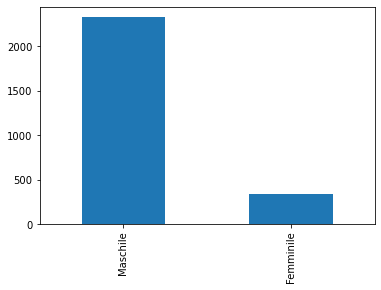

In [246]:
geovistoryDF.gender.value_counts().plot.bar()

### Question 2: In what parish live how many migrants that want to get married ? 

* DAVE: we only have origin in this data set!? should I use instead: where do the migrants come from?

In [ ]:
where do the migrants come from?

In [247]:
geovistoryDF.origin.value_counts()

Venezia IT               224
Territorio di Bergamo     70
Cadore                    37
Friuli                    35
Vicenza IT                28
                        ... 
Fossò                      1
Innsbruck AT               1
Prato Carnico              1
Montegnacco                1
Cazzano di Tramigna        1
Name: origin, Length: 588, dtype: int64

<AxesSubplot:>

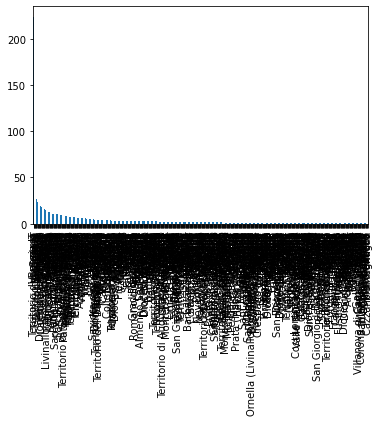

In [248]:
geovistoryDF.origin.value_counts().plot.bar(x)

<AxesSubplot:>

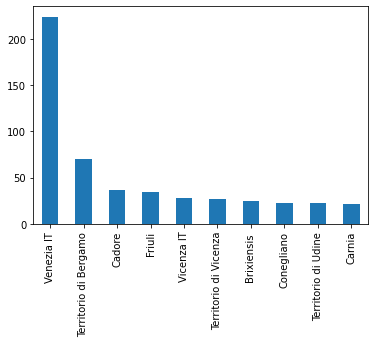

In [259]:
geovistoryDF.origin.value_counts().head(10).plot.bar()

### Question 3: what would be a good usecase?

* DAVE?

# Appendix

### we could solve it with the json_normalize solution

maybe leave this part out
* the problem is that if we have multiple entries ie for date of birth, with json_normalize we just create a new column, and cannot keep track of the old order

In [197]:
data["columns"]

{'col_0': 'Entity Preview',
 'col_1': 'Gender',
 'col_2': 'Date of Birth',
 'col_3': 'Origin',
 'col_4': 'Coordinates',
 'col_5': 'Occuptation',
 'col_6': 'Social Relationships',
 'col_7': 'social relationship partners'}

In [198]:
df.head()

,New_ID,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7
0,0,"{'entity': {'project': 1264348, 'fk_class': 21, 'pk_entity': 81417, 'fk_project': 1264348, 'class_label': 'Person', 'entity_type': 'peIt', 'entity_label': 'Tommaso di Lorenzo Spilman (tedesco)', '...","{'entities': [{'project': 1264348, 'fk_class': 629, 'pk_entity': 739340, 'fk_project': 1264348, 'class_label': 'Gender', 'entity_type': 'peIt', 'entity_label': 'Maschile', 'tmsp_last_modification'...","{'values': [{'value': {'timePrimitive': {'to': {'calJulian': '1558-01-01', 'julianDay': 2290118, 'calGregorian': '1558-01-11', 'julianSecond': 197866195200, 'calGregorianIso8601': '1558-01-11T00:0...","{'entities': [{'project': 1264348, 'fk_class': 363, 'pk_entity': 753623, 'fk_project': 1264348, 'class_label': 'Geographical Place', 'entity_type': 'peIt', 'entity_label': 'Alemania ', 'tmsp_last_...","{'values': [{'value': {'geometry': {'fkClass': 51, 'geoJSON': {'type': 'Point', 'coordinates': [12.083333, 49.016667]}, 'pkEntity': 988005}}, 'pkStatement': 988006, 'fkObjectInfo': 988005, 'fkSubj...",{'entities': []},"{'entities': [{'project': 1264348, 'fk_class': 334, 'pk_entity': 1082095, 'time_span': {'p81a': {'calendar': 'julian', 'duration': '1 year', 'julianDay': 2298884}, 'p81b': {'calendar': 'julian', '...","{'entities': [{'project': 1264348, 'fk_class': 21, 'pk_entity': 81417, 'fk_project': 1264348, 'class_label': 'Person', 'entity_type': 'peIt', 'entity_label': 'Tommaso di Lorenzo Spilman (tedesco)'..."
1,1,"{'entity': {'project': 1264348, 'fk_class': 21, 'pk_entity': 81461, 'fk_project': 1264348, 'class_label': 'Person', 'entity_type': 'peIt', 'entity_label': 'Gieremia Vais', 'tmsp_last_modification'...","{'entities': [{'project': 1264348, 'fk_class': 629, 'pk_entity': 739340, 'fk_project': 1264348, 'class_label': 'Gender', 'entity_type': 'peIt', 'entity_label': 'Maschile', 'tmsp_last_modification'...",{'values': []},{'entities': []},{'values': []},{'entities': []},{'entities': []},{'entities': []}
2,2,"{'entity': {'project': 1264348, 'fk_class': 21, 'pk_entity': 81648, 'fk_project': 1264348, 'class_label': 'Person', 'entity_type': 'peIt', 'entity_label': 'Limoletti, Domenico', 'tmsp_last_modific...","{'entities': [{'project': 1264348, 'fk_class': 629, 'pk_entity': 739340, 'fk_project': 1264348, 'class_label': 'Gender', 'entity_type': 'peIt', 'entity_label': 'Maschile', 'tmsp_last_modification'...",{'values': []},{'entities': []},{'values': []},{'entities': []},{'entities': []},{'entities': []}
3,3,"{'entity': {'project': 1264348, 'fk_class': 21, 'pk_entity': 737969, 'fk_project': 1264348, 'class_label': 'Person', 'entity_type': 'peIt', 'entity_label': 'Maestro Venere (Padova)', 'tmsp_last_mo...","{'entities': [{'project': 1264348, 'fk_class': 629, 'pk_entity': 739340, 'fk_project': 1264348, 'class_label': 'Gender', 'entity_type': 'peIt', 'entity_label': 'Maschile', 'tmsp_last_modification'...",{'values': []},{'entities': []},{'values': []},{'entities': []},{'entities': []},{'entities': []}
4,4,"{'entity': {'project': 1264348, 'fk_class': 21, 'pk_entity': 737986, 'fk_project': 1264348, 'class_label': 'Person', 'entity_type': 'peIt', 'entity_label': 'Giacomo di Cristoforo Franes (da Füssen...","{'entities': [{'project': 1264348, 'fk_class': 629, 'pk_entity': 739340, 'fk_project': 1264348, 'class_label': 'Gender', 'entity_type': 'peIt', 'entity_label': 'Maschile', 'tmsp_last_modification'...","{'values': [{'value': {'timePrimitive': {'to': {'calJulian': '1565-01-01', 'julianDay': 2292675, 'calGregorian': '1565-01-11', 'julianSecond': 198087120000, 'calGregorianIso8601': '1565-01-11T00:0...","{'entities': [{'project': 1264348, 'fk_class': 363, 'pk_entity': 1082004, 'fk_project': 1264348, 'class_label': 'Geographical Place', 'entity_type': 'peIt', 'entity_label': 'Füssen', 'tmsp_last_mo...",{'values': []},{'entities': []},"{'entities': [{'project': 1264348, 'fk_class': 334, 'pk_entity': 1082095, 'time_span': {'p81a': {'calendar': 'julian', 'duration': '1 year', 'juli

In [65]:
geovistorytest = pd.json_normalize(data= df['col_0'])
geovistorytest.head(5)

,entity.project,entity.fk_class,entity.pk_entity,entity.fk_project,entity.class_label,entity.entity_type,entity.entity_label,entity.tmsp_last_modification
0,1264348,21,81417,1264348,Person,peIt,Tommaso di Lorenzo Spilman (tedesco),2021-08-28T10:19:56.637142+00:00
1,1264348,21,81461,1264348,Person,peIt,Gieremia Vais,2021-08-18T19:44:44.765708+00:00
2,1264348,21,81648,1264348,Person,peIt,"Limoletti, Domenico",2021-08-18T19:44:44.765708+00:00
3,1264348,21,737969,1264348,Person,peIt,Maestro Venere (Padova),2021-08-18T19:44:44.765708+00:00
4,1264348,21,737986,1264348,Person,peIt,Giacomo di Cristoforo Franes (da Füssen),2021-08-28T10:19:56.637142+00:00


In [105]:
geovistoryName = pd.json_normalize(data= df['col_0'])['entity.entity_label']
geovistoryName.head(5)

0        Tommaso di Lorenzo Spilman (tedesco)
1                               Gieremia Vais
2                         Limoletti, Domenico
3                     Maestro Venere (Padova)
4    Giacomo di Cristoforo Franes (da Füssen)
Name: entity.entity_label, dtype: object

In [108]:
geovistorytest = pd.json_normalize(data= df['col_1'])
geovistorytest.head(5)

,entities
0,"[{'project': 1264348, 'fk_class': 629, 'pk_ent..."
1,"[{'project': 1264348, 'fk_class': 629, 'pk_ent..."
2,"[{'project': 1264348, 'fk_class': 629, 'pk_ent..."
3,"[{'project': 1264348, 'fk_class': 629, 'pk_ent..."
4,"[{'project': 1264348, 'fk_class': 629, 'pk_ent..."


In [70]:
geovistorytest = pd.json_normalize(data= df['col_1'], record_path=['entities'])
geovistorytest.head(5)

,project,fk_class,pk_entity,fk_project,class_label,entity_type,entity_label,tmsp_last_modification
0,1264348,629,739340,1264348,Gender,peIt,Maschile,2021-08-28T10:19:56.637142+00:00
1,1264348,629,739340,1264348,Gender,peIt,Maschile,2021-08-28T10:19:56.637142+00:00
2,1264348,629,739340,1264348,Gender,peIt,Maschile,2021-08-28T10:19:56.637142+00:00
3,1264348,629,739340,1264348,Gender,peIt,Maschile,2021-08-28T10:19:56.637142+00:00
4,1264348,629,739340,1264348,Gender,peIt,Maschile,2021-08-28T10:19:56.637142+00:00


In [71]:
geovistoryGender = pd.json_normalize(data= df['col_1'], record_path=['entities'])['entity_label']
geovistorytest.head(5)

0    Maschile
1    Maschile
2    Maschile
3    Maschile
4    Maschile
Name: entity_label, dtype: object

In [117]:
pd.options.display.max_colwidth = 500
geovistorytest = pd.json_normalize(data= df['col_2'])
geovistorytest.head(20)

,values
0,"[{'value': {'timePrimitive': {'to': {'calJulian': '1558-01-01', 'julianDay': 2290118, 'calGregorian': '1558-01-11', 'julianSecond': 197866195200, 'calGregorianIso8601': '1558-01-11T00:00:00Z'}, 'from': {'calJulian': '1557-01-01', 'julianDay': 2289753, 'calGregorian': '1557-01-11', 'julianSecond': 197834659200, 'calGregorianIso8601': '1557-01-11T00:00:00Z'}, 'label': '1557-01-01 (1 year)', 'fkClass': 335, 'calendar': 'julian', 'duration': '1 year', 'pkEntity': 81428, 'julianDay': 2289753}}, '..."
1,[]
2,[]
3,[]
4,"[{'value': {'timePrimitive': {'to': {'calJulian': '1565-01-01', 'julianDay': 2292675, 'calGregorian': '1565-01-11', 'julianSecond': 198087120000, 'calGregorianIso8601': '1565-01-11T00:00:00Z'}, 'from': {'calJulian': '1564-01-01', 'julianDay': 2292309, 'calGregorian': '1564-01-11', 'julianSecond': 198055497600, 'calGregorianIso8601': '1564-01-11T00:00:00Z'}, 'label': '1564-01-01 (1 year)', 'fkClass': 335, 'calendar': 'julian', 'duration': '1 year', 'pkEntity': 741548, 'julianDay': 2292309}}, ..."
5,"[{'value': {'timePrimitive': {'to': {'calJulian': '1567-01-01', 'julianDay': 2293405, 'calGregorian': '1567-01-11', 'julianSecond': 198150192000, 'calGregorianIso8601': '1567-01-11T00:00:00Z'}, 'from': {'calJulian': '1566-01-01', 'julianDay': 2293040, 'calGregorian': '1566-01-11', 'julianSecond': 198118656000, 'calGregorianIso8601': '1566-01-11T00:00:00Z'}, 'label': '1566-01-01 (1 year)', 'fkClass': 335, 'calendar': 'julian', 'duration': '1 year', 'pkEntity': 750646, 'julianDay': 2293040}}, ..."
6,"[{'value': {'timePrimitive': {'to': {'calJulian': '1571-01-01', 'julianDay': 2294866, 'calGregorian': '1571-01-11', 'julianSecond': 198276422400, 'calGregorianIso8601': '1571-01-11T00:00:00Z'}, 'from': {'calJulian': '1570-01-01', 'julianDay': 2294501, 'calGregorian': '1570-01-11', 'julianSecond': 198244886400, 'calGregorianIso8601': '1570-01-11T00:00:00Z'}, 'label': '1570-01-01 (1 year)', 'fkClass': 335, 'calendar': 'julian', 'duration': '1 year', 'pkEntity': 738067, 'julianDay': 2294501}}, ..."
7,"[{'value': {'timePrimitive': {'to': {'calJulian': '1566-01-01', 'julianDay': 2293040, 'calGregorian': '1566-01-11', 'julianSecond': 198118656000, 'calGregorianIso8601': '1566-01-11T00:00:00Z'}, 'from': {'calJulian': '1565-01-01', 'julianDay': 2292675, 'calGregorian': '1565-01-11', 'julianSecond': 198087120000, 'calGregorianIso8601': '1565-01-11T00:00:00Z'}, 'label': '1565-01-01 (1 year)', 'fkClass': 335, 'calendar': 'julian', 'duration': '1 year', 'pkEntity': 738029, 'julianDay': 2292675}}, ..."
8,"[{'value': {'timePrimitive': {'to': {'calJulian': '1559-01-01', 'julianDay': 2290483, 'calGregorian': '1559-01-11', 'julianSecond': 197897731200, 'calGregorianIso8601': '1559-01-11T00:00:00Z'}, 'from': {'calJulian': '1558-01-01', 'julianDay': 2290118, 'calGregorian': '1558-01-11', 'julianSecond': 197866195200, 'calGregorianIso8601': '1558-01-11T00:00:00Z'}, 'label': '1558-01-01 (1 year)', 'fkClass': 335, 'calendar': 'julian', 'duration': '1 year', 'pkEntity': 737992, 'julianDay': 2290118}}, ..."
9,"[{'value': {'timePrimitive': {'to': {'calJulian': '1571-01-01', 'julianDay': 2294866, 'calGregorian': '1571-01-11', 'julianSecond': 198276422400, 'calGregorianIso8601': '1571-01-11T00:00:00Z'}, 'from': {'calJulian': '1570-01-01', 'julianDay': 2294501, 'calGregorian': '1570-01-11', 'julianSecond': 198244886400, 'calGregorianIso8601': '1570-01-11T00:00:00Z'}, 'label': '1570-01-01 (1 year)', 'fkClass': 335, 'calendar': 'julian', 'duration': '1 year', 'pkEntity': 738067, 'julianDay': 2294501}}, ..."


In [126]:
geovistorytest = pd.json_normalize(data= df['col_2'],record_path=['values'], meta=['New_ID'], errors='ignore')
geovistorytest.head(20)

,pkStatement,fkObjectInfo,fkSubjectInfo,value.timePrimitive.to.calJulian,value.timePrimitive.to.julianDay,value.timePrimitive.to.calGregorian,value.timePrimitive.to.julianSecond,value.timePrimitive.to.calGregorianIso8601,value.timePrimitive.from.calJulian,value.timePrimitive.from.julianDay,value.timePrimitive.from.calGregorian,value.timePrimitive.from.julianSecond,value.timePrimitive.from.calGregorianIso8601,value.timePrimitive.label,value.timePrimitive.fkClass,value.timePrimitive.calendar,value.timePrimitive.duration,value.timePrimitive.pkEntity,value.timePrimitive.julianDay,New_ID
0,81432,81428,81430,1558-01-01,2290118,1558-01-11,197866195200,1558-01-11T00:00:00Z,1557-01-01,2289753,1557-01-11,197834659200,1557-01-11T00:00:00Z,1557-01-01 (1 year),335,julian,1 year,81428,2289753,NaN
1,81433,81429,81430,1560-01-01,2290848,1560-01-11,197929267200,1560-01-11T00:00:00Z,1559-01-01,2290483,1559-01-11,197897731200,1559-01-11T00:00:00Z,1559-01-01 (1 year),335,julian,1 year,81429,2290483,NaN
2,741549,741548,737993,1565-01-01,2292675,1565-01-11,198087120000,1565-01-11T00:00:00Z,1564-01-01,2292309,1564-01-11,198055497600,1564-01-11T00:00:00Z,1564-01-01 (1 year),335,julian,1 year,741548,2292309,NaN
3,738004,738003,737993,1569-01-01,2294136,1569-01-11,198213350400,1569-01-11T00:00:00Z,1568-01-01,2293770,1568-01-11,198181728000,1568-01-11T00:00:00Z,1568-01-01 (1 year),335,julian,1 year,738003,2293770,NaN
4,1082979,750646,738030,1567-01-01,2293405,1567-01-11,198150192000,1567-01-11T00:00:00Z,1566-01-01,2293040,1566-01-11,198118656000,1566-01-11T00:00:00Z,1566-01-01 (1 year),335,julian,1 year,750646,2293040,NaN
5,738034,738003,738030,1569-01-01,2294136,1569-01-11,198213350400,1569-01-11T00:00:00Z,1568-01-01,2293770,1568-01-11,198181728000,1568-01-11T00:00:00Z,1568-01-01 (1 year),335,julian,1 year,738003,2293770,NaN
6,738070,738067,738068,1571-01-01,2294866,1571-01-11,198276422400,1571-01-11T00:00:00Z,1570-01-01,2294501,1570-01-11,198244886400,1570-01-11T00:00:00Z,1570-01-01 (1 year),335,julian,1 year,738067,2294501,NaN
7,738072,738066,738068,1575-01-01,2296327,1575-01-11,198402652800,1575-01-11T00:00:00Z,1574-01-01,2295962,1574-01-11,198371116800,1574-01-11T00:00:00Z,1574-01-01 (1 year),335,julian,1 year,738066,2295962,NaN
8,738105,738029,738103,1566-01-01,2293040,1566-01-11,198118656000,1566-01-11T00:00:00Z,1565-01-01,2292675,1565-01-11,198087120000,1565-01-11T00:00:00Z,1565-01-01 (1 year),335,julian,1 year,738029,2292675,NaN
9,738107,738003,738103,1569-01-01,2294136,1569-01-11,198213350400,1569-01-11T00:00:00Z,1568-01-01,2293770,1568-01-11,198181728000,1568-01-11T00:00:00Z,1568-01-01 (1 year),335,julian,1 year,738003,2293770,NaN


In [74]:
len(geovistorytest)

3060

In [120]:
df.shape

(2705, 8)

In [ ]:
# show that we have complex data with multiple entries for the same infor i.e. jobs, birthdate etc. 
df.loc[197,'col_5']